In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/d2800/Desktop/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


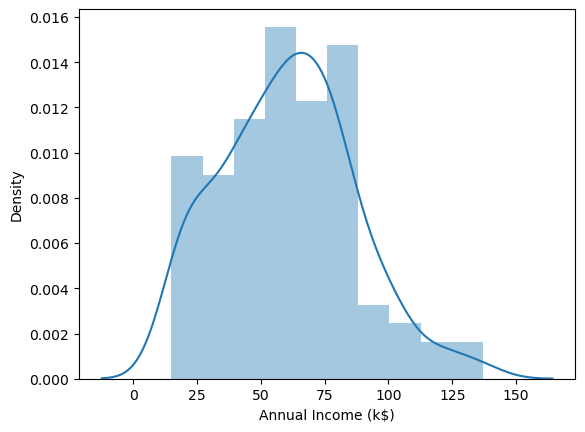

In [6]:
sns.distplot(df['Annual Income (k$)']);

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

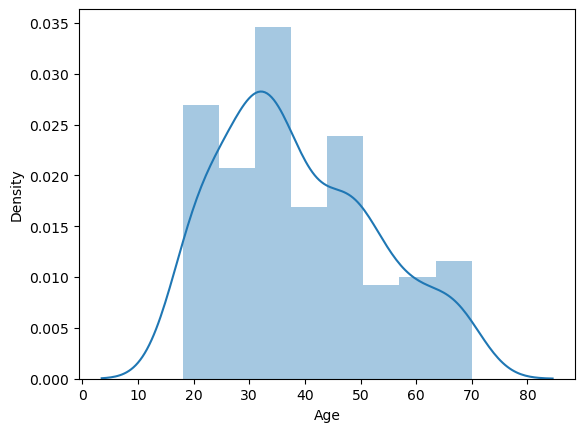

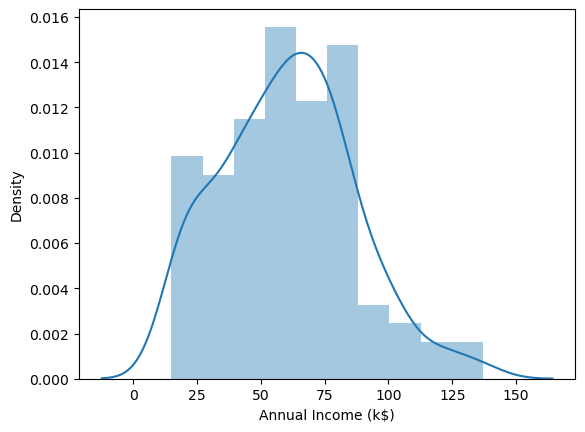

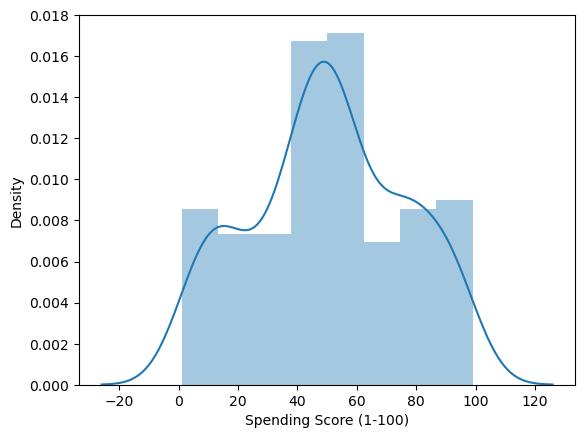

In [8]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'] 
for i in columns:
    plt.figure()
    sns.distplot(df[i]);

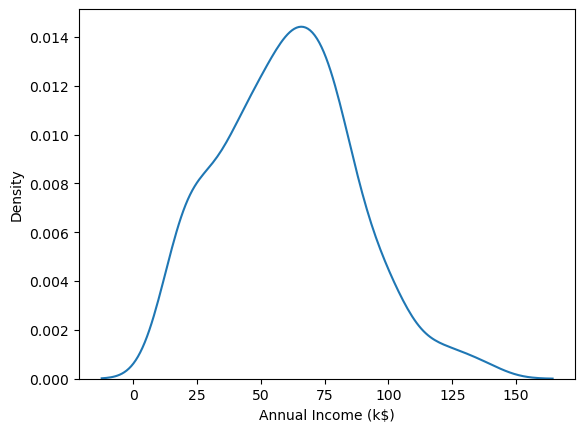

In [9]:
sns.kdeplot(df['Annual Income (k$)']);

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

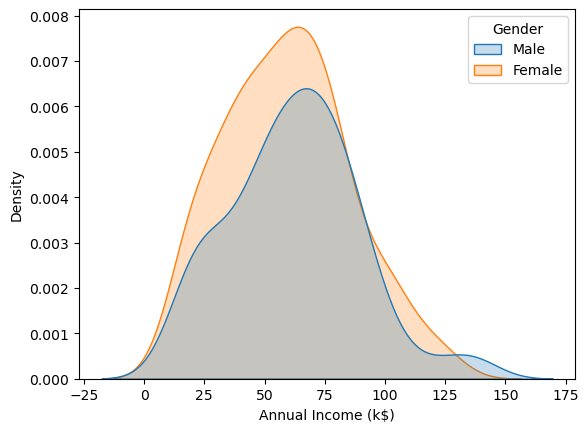

In [13]:
sns.kdeplot(
    data=df,
    x="Annual Income (k$)",
    hue="Gender",
    fill=True  # replaces shade=True in recent seaborn versions
)

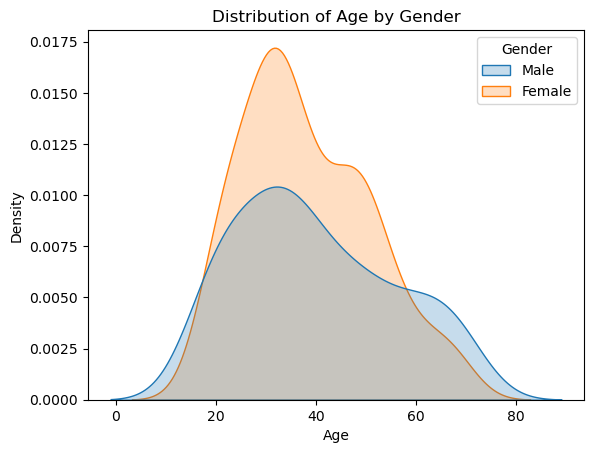

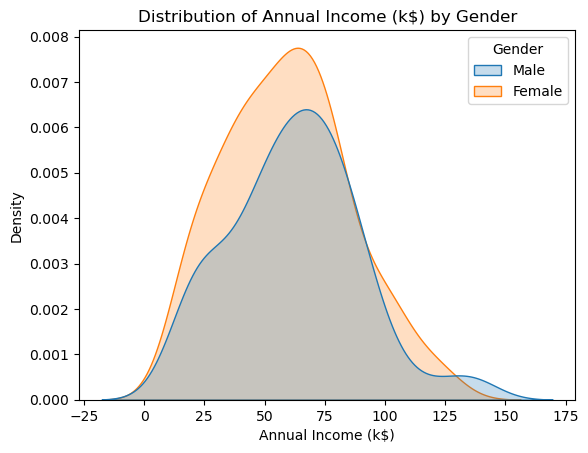

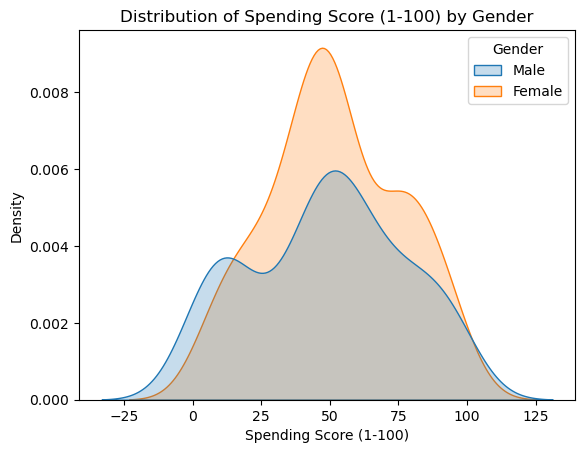

In [15]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in columns:
    plt.figure()
    sns.kdeplot(
        data=df,
        x=col,          # 👈 just the string, not [col]
        hue="Gender",
        fill=True
    )
    plt.title(f"Distribution of {col} by Gender")
    plt.show()

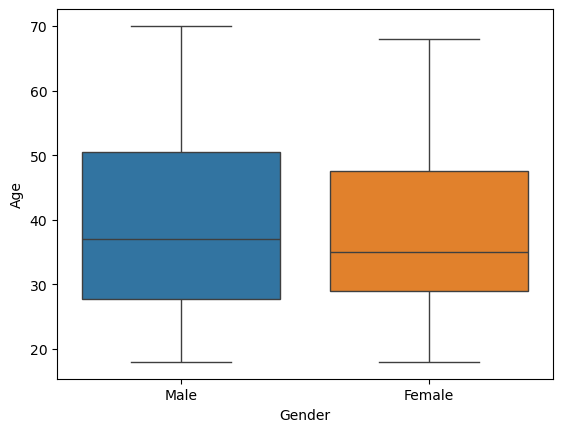

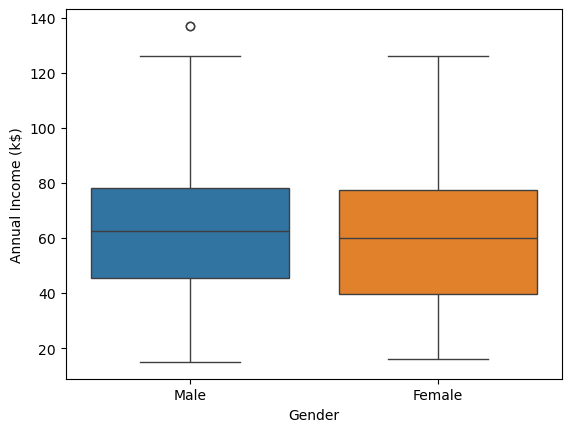

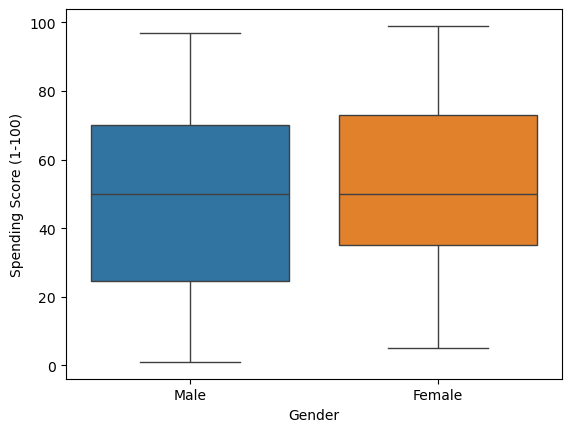

In [20]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.boxplot(
        data=df,
        x='Gender', hue="Gender",         # 👈 just the string, not [col]
        y=df[i])

In [23]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

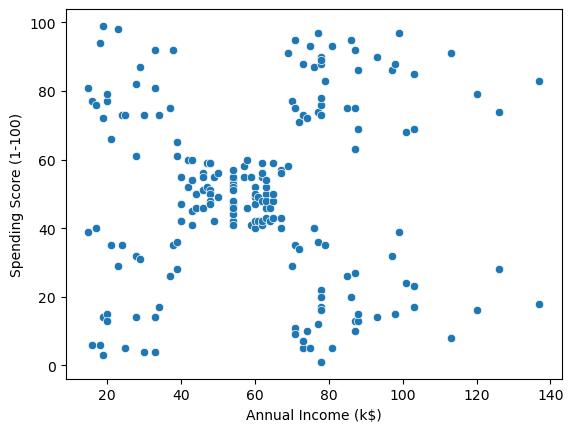

In [24]:
sns.scatterplot(data=df, x=
'Annual Income (k$)', y=
                'Spending Score (1-100)')


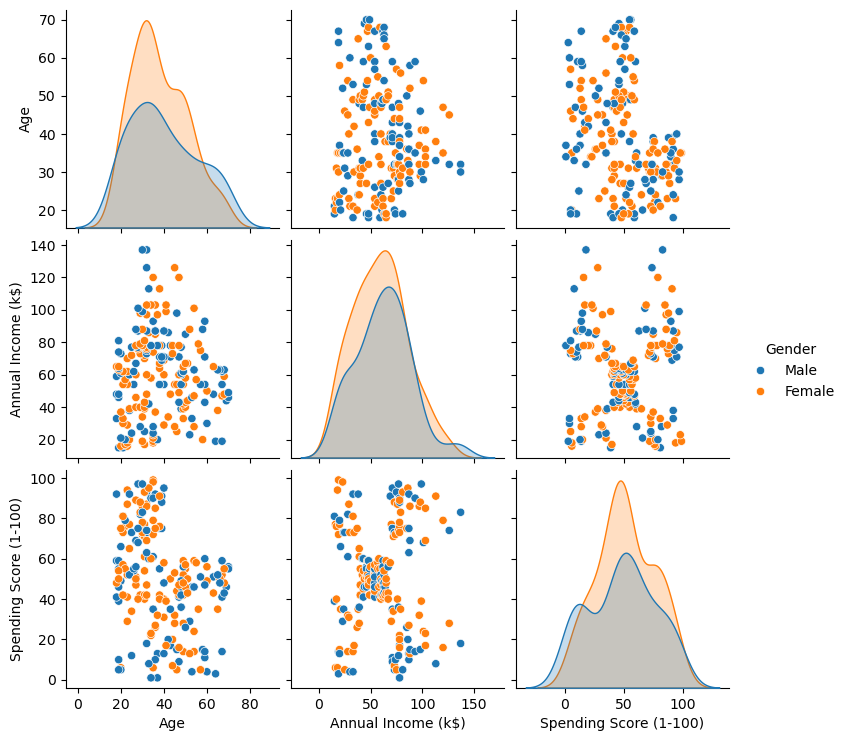

In [27]:
#df=df.drop('CustomerID', axis=1)
sns.pairplot(df,hue='Gender')

In [32]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [34]:
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

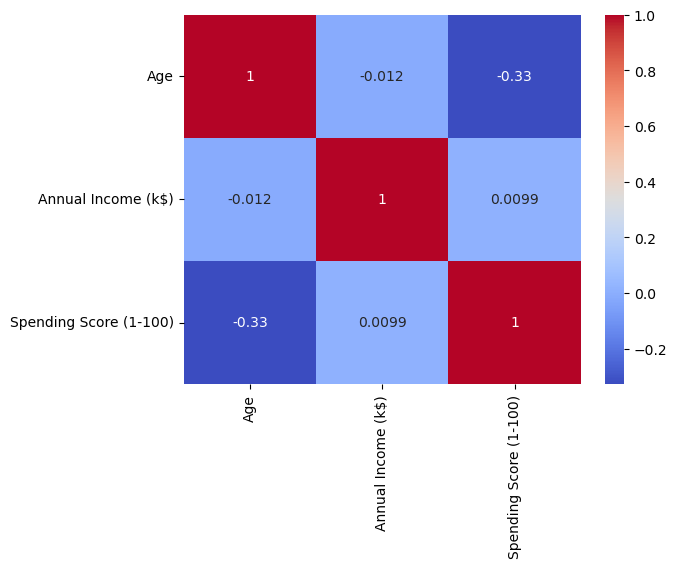

In [35]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [46]:
clustering1 = KMeans(n_clusters=6)

In [47]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [48]:
clustering1.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5,
       5, 5], dtype=int32)

In [49]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,4
3,Female,23,16,77,4
4,Female,31,17,40,4


In [50]:
df['Income Cluster'].value_counts()

Income Cluster
1    54
2    50
0    42
4    32
3    16
5     6
Name: count, dtype: int64

In [51]:
clustering1.inertia_

5443.614973544973

In [54]:
inertia_scores=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [55]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 25341.285871863212,
 13308.108021390362,
 9407.908188585603,
 5081.484660267268,
 5033.164890002785,
 3505.380039525694,
 2190.0972210795735,
 1776.283477633479]

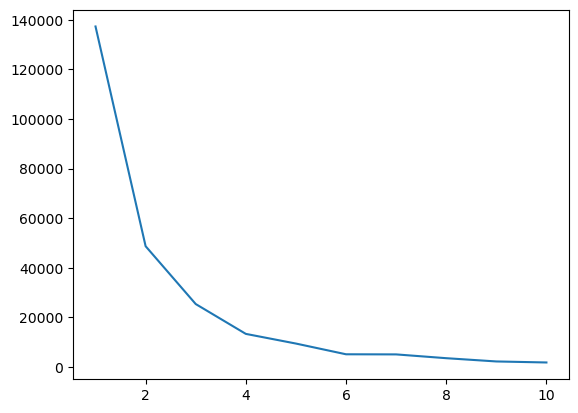

In [56]:
plt.plot(range(1,11), inertia_scores)

In [57]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [61]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,43.000000,42.238095,50.666667
1,36.018519,78.370370,49.555556
2,41.520000,60.440000,50.060000
3,37.812500,100.875000,52.875000
4,34.906250,22.000000,49.656250
5,36.833333,127.666667,49.666667


# Bivariate Clustering

In [72]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,4
1,Male,21,15,81,4,3
2,Female,20,16,6,4,4
3,Female,23,16,77,4,3
4,Female,31,17,40,4,4


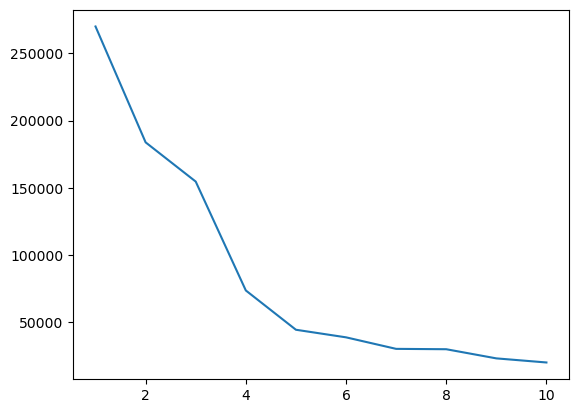

In [71]:
inertia_scores2 = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [80]:
centers= pd.DataFrame(clustering2.cluster_centers_)
centers.columns= ['x','y']

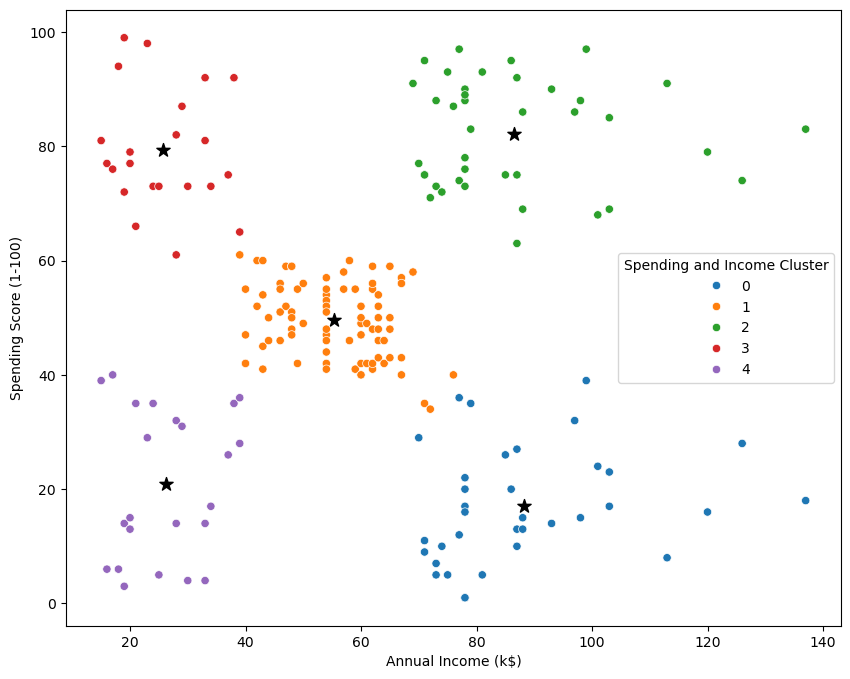

In [108]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black', marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y= 'Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivariate.png')

In [85]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.538462,0.461538
3,0.590909,0.409091
4,0.608696,0.391304


In [87]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


# Multivariate Clustering


In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scale= StandardScaler()

In [90]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,4
1,Male,21,15,81,4,3
2,Female,20,16,6,4,4
3,Female,23,16,77,4,3
4,Female,31,17,40,4,4


In [93]:
dff= pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,4,4,True
1,21,15,81,4,3,True
2,20,16,6,4,4,False
3,23,16,77,4,3,False
4,31,17,40,4,4,False


In [94]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [96]:
dff= dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
        'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [101]:
dff = scale.fit_transform(dff)

In [103]:
dff = pd.DataFrame(scale.fit_transform(dff))

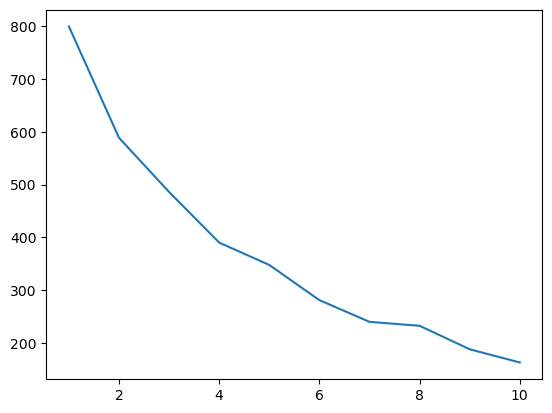

In [105]:
inertia_scores3 = []

for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [106]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,4
1,Male,21,15,81,4,3
2,Female,20,16,6,4,4
3,Female,23,16,77,4,3
4,Female,31,17,40,4,4
...,...,...,...,...,...,...
195,Female,35,120,79,5,2
196,Female,45,126,28,5,0
197,Male,32,126,74,5,2
198,Male,32,137,18,5,0


In [113]:
df.to_csv('Clustering.csv')